<a href="https://colab.research.google.com/github/WisdomerLee/Pytorch/blob/main/7LayerExplaination.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Layer Explaination

In [ ]:
import tensorflow as tf

Input Image
input으로 들어갈 DataSet을 들여다보면서 시각화를

패키지 로드
os
glob
matplotlib

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from tensorflow.keras import datasets

(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

In [ ]:
image = train_x[0]

그림을 열었으니 무엇을..?

In [ ]:
image.shape #그림을 확인하기 전에 차원, 모습을 알아내고 진행하기..

(28, 28)

차원 수를 확인했는데 어떤 결과가..?

[batch_size, height, width, channel]

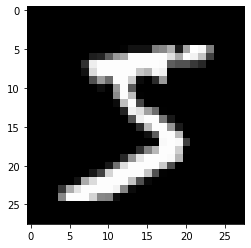

In [ ]:
plt.imshow(image, 'gray')
plt.show()

In [ ]:
image = image[tf.newaxis, ..., tf.newaxis]
image.shape

(1, 28, 28, 1)

Feature Extraction

데이터를 Feature Extraction 한 뒤에 classification이 진행됨

Convolution
filters : Layer에서 나갈 때 몇 개의 filter를 만들 것인가?(weight, filter, channel)
kernel_size: filter(weight)의 크기
strides: 몇 개의 pixel을 뛰어넘어가면서 훑어나갈 것인가
padding: zero padding을 만들 것인지, VALID는 Padding이 없고 SAME은 Padding이 있음(크기에도 영향을)
activation: Activation Function을 만들 것인지, 당장 설정하지 않아도 Layer 층을 따로 만들 수 있음

In [ ]:
tf.keras.layers.Conv2D(filters = 3, kernel_size = (3,3), strides =(1,1), padding='SAME', activation = 'relu')

(3,3)대신 3으로 대체 가능

In [ ]:
tf.keras.layers.Conv2D(3,3, 1, 'SAME')

Visualization
tf.keras.layser.Conv2D

In [ ]:
image = tf.cast(image, dtype = tf.float32)
image.dtype

tf.float32

In [ ]:
layer = tf.keras.layers.Conv2D(5,3,1, padding = 'SAME')
layer

In [ ]:
output = layer(image)

In [ ]:
import numpy as np
np.min(image), np.max(image)

(0.0, 255.0)

In [ ]:
np.min(output), np.max(output)

(-335.87143, 177.32864)

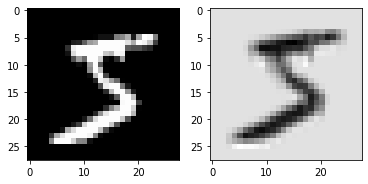

In [ ]:
plt.subplot(1,2,1)
plt.imshow(image[0, :, :, 0], 'gray')
plt.subplot(1,2,2,)
plt.imshow(output[0, :, :, 0], 'gray')
plt.show()

weight 불러오기
layer.get_weights()

In [ ]:
weight = layer.get_weights()

In [ ]:
weight

[array([[[[-0.07048336, -0.1507814 , -0.03259492, -0.02738628,
           -0.16914408]],
 
         [[ 0.2587169 ,  0.01479039,  0.32341895, -0.2363523 ,
           -0.2982243 ]],
 
         [[-0.04147974,  0.32032445, -0.3114338 ,  0.00794768,
            0.13921371]]],
 
 
        [[[-0.32062468, -0.02121815,  0.09530315, -0.02744937,
            0.21282652]],
 
         [[-0.08184543, -0.18392777,  0.09337249, -0.04343882,
            0.20277253]],
 
         [[-0.28381214, -0.22082281,  0.24231496, -0.10815629,
            0.261381  ]]],
 
 
        [[[-0.31039095, -0.16412029,  0.30430213,  0.15449533,
           -0.14824948]],
 
         [[-0.17863393, -0.13189213, -0.23083608,  0.0921979 ,
           -0.06275192]],
 
         [[-0.14498219,  0.07415119, -0.10305183, -0.274126  ,
           -0.06723133]]]], dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32)]

In [ ]:
len(weight)

2

In [ ]:
weight[0].shape, weight[1].shape

((3, 3, 1, 5), (5,))

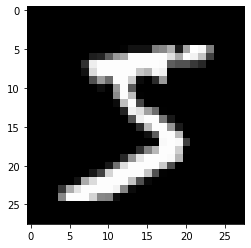

In [ ]:
plt.imshow(image[0, :, :, 0], 'gray')
plt.show()

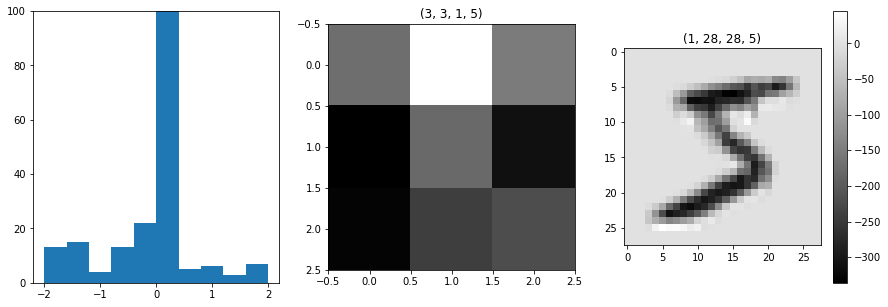

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.hist(output.numpy().ravel(), range=[-2, 2])
plt.ylim(0,100)
plt.subplot(132)
plt.title(weight[0].shape)
plt.imshow(weight[0][:,:,0,0], 'gray')
plt.subplot(133)
plt.title(output.shape)
plt.imshow(output[0,:,:,0], 'gray')
plt.colorbar()
plt.show()

In [ ]:
import numpy as np

In [ ]:
np.min(output), np.max(output)

(-335.87143, 177.32864)

Activation Function

In [ ]:
tf.keras.layers.ReLU() # 0이하의 값은 0으로 고정!

In [ ]:
act_layer= tf.keras.layers.ReLU() #레이어 만들기
act_output = act_layer(output) #적용

In [ ]:
output.shape

TensorShape([1, 28, 28, 5])

In [ ]:
np.min(act_output), np.max(act_output)

(0.0, 177.32864)

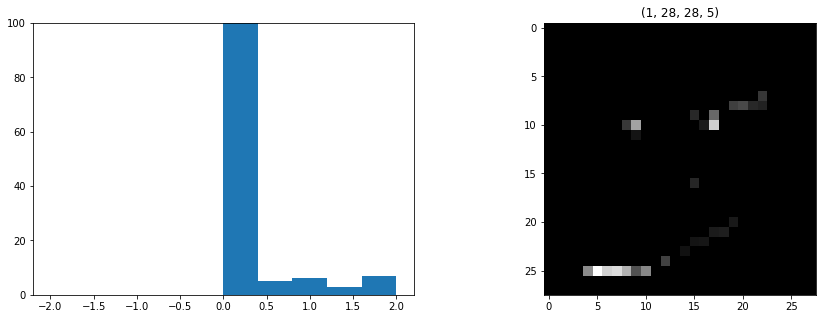

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.hist(act_output.numpy().ravel(), range=[-2, 2])
plt.ylim(0, 100)

plt.subplot(122)
plt.title(act_output.shape)
plt.imshow(act_output[0, :,:, 0], 'gray')
plt.show()

Pooling
tf.keras.layers.MaxPool2D

In [ ]:
#그림을 받으면 강조된 부분만 얻어서 크기를 줄이는 것.... 크기를 반씩 줄이기

In [ ]:
tf.keras.layers.MaxPool2D(pool_size =(2,2), strides =(2,2), padding = 'SAME')

In [ ]:
pool_layer = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides = (2,2), padding= 'SAME')
pool_output = pool_layer(act_output)

In [ ]:
act_output.shape

TensorShape([1, 28, 28, 5])

In [ ]:
pool_output.shape

TensorShape([1, 14, 14, 5])

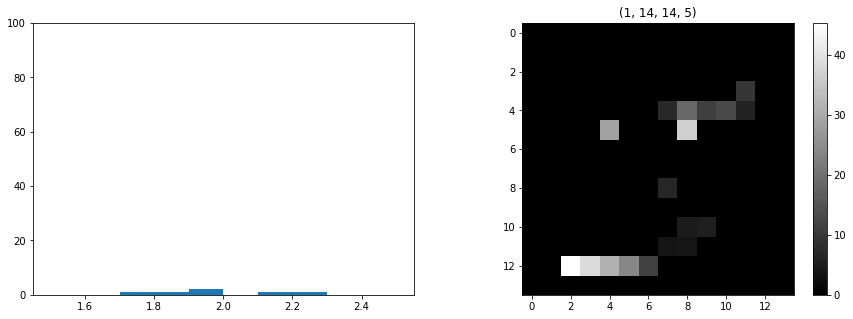

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(pool_output.numpy().ravel(), range =[2,2])
plt.ylim(0, 100)

plt.subplot(122)
plt.title(pool_output.shape)
plt.imshow(pool_output[0,:,:,0], 'gray')
plt.colorbar()
plt.show()

Fully Connected
DNN
input에서 1차원으로 펼쳐지면 노드와 1:1로 연결됨, 연결된 부분마다 수식이 들어감
bias node: 상수처럼 더해짐

Flatten
: 2,3차원의 데이터를 일렬로.. 1차원으로
tf.keras.layers.Flatten()

In [ ]:
import tensorflow as tf

In [ ]:
tf.keras.layers.Flatten()

In [ ]:
layer = tf.keras.layers.Flatten()

In [ ]:
flatten = layer(output)

In [ ]:
output.shape

TensorShape([1, 28, 28, 5])

In [ ]:
flatten.shape

TensorShape([1, 3920])

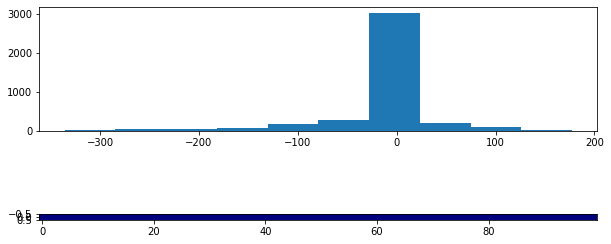

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(211)
plt.hist(flatten.numpy().ravel())
plt.subplot(212)
plt.imshow(flatten[:, :100], 'jet')
plt.show()

Dense
tf.keras.layers.Dense
하나씩 다 연결

In [ ]:
tf.keras.layers.Dense(32, activation='relu')

In [ ]:
layer = tf.keras.layers.Dense(32, activation = 'relu')

In [ ]:
output = layer(flatten)

In [ ]:
output.shape

TensorShape([1, 32])

In [ ]:
layer_2 = tf.keras.layers.Dense(10, activation = 'relu')
output_example = layer_2(output)

In [ ]:
output_example.shape

TensorShape([1, 10])

DropOut
tf.keras.layers.Dropout

전부 연결하여 오버피팅이 발생하기도 하는데 뉴런 연결처럼 특정 부분 연결을 끊고 연결하는 식으로 바꾸는 것
인공지능이 학습할 때만 Dropout이 진행


In [ ]:
layer = tf.keras.layers.Dropout(0.7)
output = layer(output)

In [ ]:
output.shape

TensorShape([1, 32])

Build Model

In [ ]:
from tensorflow.keras import layers

In [ ]:
input_shape =(28, 28, 1)
num_classes = 10

In [ ]:
inputs = layers.Input(shape = input_shape)

#특정 추출
net = layers.Conv2D(32, 3, padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, 3, padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(32, 3, padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, 3, padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPool2D((2,2))(net)
net = layers.Dropout(0.25)(net)

#Fully Connected

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.25)(net)
net = layers.Dense(10)(net)
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs = inputs, outputs=net, name='Basic_CNN')

In [ ]:
model

In [ ]:
model.summary()

Model: "Basic_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_3 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 32)        0 